<a href="https://colab.research.google.com/github/AlirezaSalehy/AlirezaSalehy/blob/main/CLIP/CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment this to install
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=24d8b023c0194885c5a5155a2c8c65dc24572e037232e193bfcc7e558e072bf2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [51]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm

# Here we load the multilingual CLIP model. Note, this model can only encode text.
# If you need embeddings for images, you must load the 'clip-ViT-B-32' model
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

In [3]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d adityajn105/flickr8k

 99% 1.03G/1.04G [00:05<00:00, 195MB/s]
100% 1.04G/1.04G [00:05<00:00, 195MB/s]


In [ ]:
!unzip \flickr8k.zip -d \flickr8k

In [9]:
data_path = "flickr8k/"

In [37]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:51<00:00, 66.5MB/s]
100% 2.29G/2.29G [00:51<00:00, 48.0MB/s]


In [ ]:
!unzip \chest-xray-pneumonia.zip -d \chest-xray-pneumonia

In [ ]:
!ls chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0131-0001.jpeg

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(images, query, n_row=2, n_col=2):
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.set_title(query)
        ax.imshow(img)
    plt.show()

In [8]:
#For embedding images, we need the non-multilingual CLIP model
img_model = SentenceTransformer('clip-ViT-B-32')

img_names = list(glob.glob(f'{data_path}Images/*.jpg'))
print("Images:", len(img_names))
img_emb = img_model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

Images: 8091


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

In [10]:
# Next, we define a search function.
def search(query, k=4):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    hits, dist = util.semantic_search(query_emb, img_emb, top_k=k)

    print(dists)

    matched_images = []
    for hit in hits:
        matched_images.append(Image.open(img_names[hit['corpus_id']]))

    plot_images(matched_images, query)
    #print(matched_images)

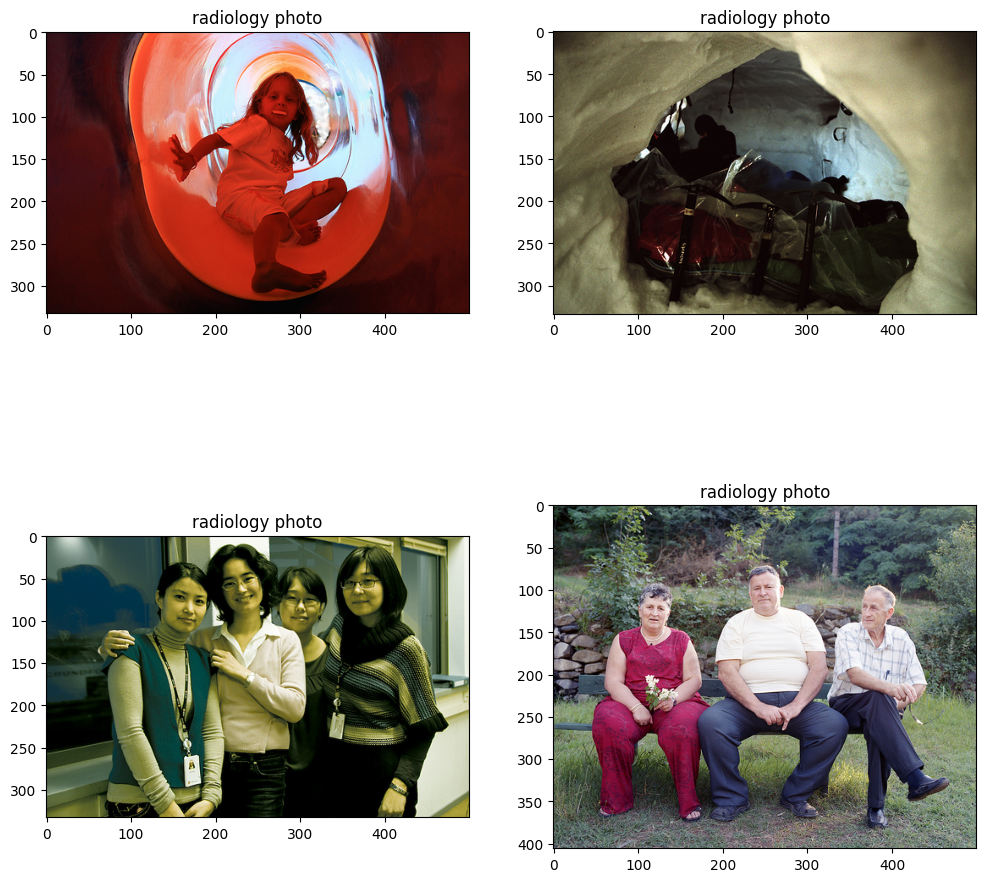

In [48]:
search("radiology photo")

In [45]:
xray_chest_path = 'chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0131-0001.jpeg'

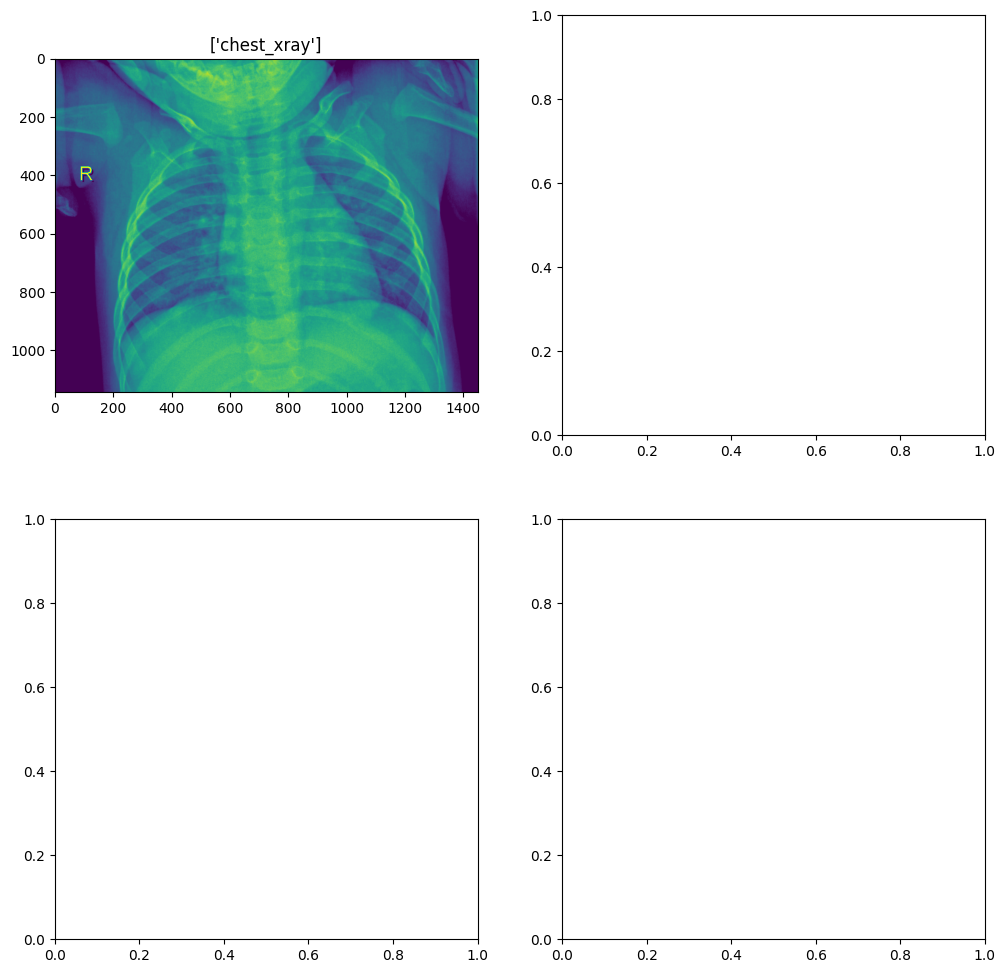

In [47]:
img = Image.open(xray_chest_path)
plot_images([img], ['chest_xray'])

In [90]:
import torch
from torch.nn.functional import cosine_similarity

xray_queries = ['radiology image', 'color', 'cat', 'photo', 'brain mri']
xray_emb = img_model.encode(img, convert_to_tensor=True, show_progress_bar=False).reshape(1, -1)
for i, prmpt in enumerate(xray_queries):
  pmpt_emb = model.encode(sentences=[prmpt], convert_to_tensor=True, show_progress_bar=False)
  print(cosine_similarity(pmpt_emb, xray_emb))

tensor([0.3064], device='cuda:0')
tensor([0.1942], device='cuda:0')
tensor([0.2046], device='cuda:0')
tensor([0.2150], device='cuda:0')
tensor([0.2085], device='cuda:0')


In [79]:
pmpt_embs.shape

torch.Size([512])

In [ ]:
import torch
from torch.nn.functional import cosine_similarity

xray_queries = ['radiology image', 'color', 'cat', 'photo', 'brain mri']
xray_emb = img_model.encode(img, convert_to_tensor=True, show_progress_bar=False).reshape(1, -1)
for i, prmpt in enumerate(xray_queries):
  pmpt_emb = model.encode(sentences=[prmpt], convert_to_tensor=True, show_progress_bar=False)
  print(cosine_similarity(pmpt_emb, xray_emb))

tensor([0.3064], device='cuda:0')
tensor([0.1942], device='cuda:0')
tensor([0.2046], device='cuda:0')
tensor([0.2150], device='cuda:0')
tensor([0.2085], device='cuda:0')
